<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**dataset selection:** 

* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv):
* ['rainfall-monthly-number-of-rain-days.csv'](./data/rainfall-monthly-number-of-rain-days.csv):


## Problem Statement

Background:
Singapore is known for its stunning outdoor activities and shows, the top two on the list would be "Spectra at Marina Bay Sands" and "OCBC Garden Rhapsody" at Gardens by the Bay. These events draw crowds of visitors who want to enjoy the spectacle, but the weather in Singapore can be unpredictable. Sudden rain showers can disrupt these outdoor events, leading to disappointment for attendees, especially for the international tourists who stay in a short period of time. To enhance the visitor experience and mitigate risks, it's essential to predict the probability of rain during the time of these events (Spectra at Marina Bay Sands show starts at 8 pm daily and OCBC Garden Rhapsody at Gardens by the Bay starts at 7:45 pm daily).

Objective:
The objective of this project is to develop estimate probability of rain occurring during the scheduled time of "Spectra at Marina Bay Sands" and "OCBC Garden Rhapsody." Since the schedule of the events are fixed, this information should be very useful for the tourists to plan their visit to these places, or to prepare for the rain if rescheduling is not possible.

Data:
The datasets used in this project are number of raining day in a month and total volume of rainfall in a month and 5 other dataset relevant to weather, which are: relative humidity, maximum rainfall in a day, Average air temperature, hourly wet bulb temperature, and Average sunshine hour in a day. In additional to probelm statement, the number of international visitor arrived in Singapore also used.

Deliverables:
Provide a probability of rain occurring during the scheduled time of "Spectra at Marina Bay Sands" and "OCBC Garden Rhapsody" through out the year.

Success Criteria:
Success is measured by the model's accuracy in predicting rain probability, helping reduce weather-related disruptions at outdoor events in Singapore.




### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

It is good to know that in which period would be the peak in terms of number of tourists visiting Singapore. This will help us to identify the period of time that we should focus on.

Source: Number of Internaitonal Visitor arrival. Source from Singapore Tourism Board. Retrieved from https://www.singstat.gov.sg/publications/reference/ebook/industry/tourism

In [3]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [4]:
# Code:
def cal_mean(data_list):
    sum = 0
    for i in range(len(data_list)):
        sum += data_list[i]
    return sum/len(data_list)


In [5]:
list1 = [30,31,45,60,76,44,33,12,90,50,55]
cal_mean(list1)

47.81818181818182

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [6]:
# Code:
def cal_std(data_list):
    mean = cal_mean(data_list)
    sum = 0
    for i in range(len(data_list)):
        sum += (data_list[i]-mean)**2
    return (sum/len(data_list))**0.5


In [7]:
cal_std(list1)

21.113624131516175

## Numpy function proof my own function (finding standard deviation)

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [8]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [9]:
# Code:
rain_high_daily = pd.read_csv('../data/RainfallMonthlyHighestDailyTotal.csv')
rain_num_day = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
wet_bulb = pd.read_csv('../data/WetBulbTemperatureHourly.csv')
rain_month_total = pd.read_csv('../data/rainfall-monthly-total.csv')
humid_month = pd.read_csv('../data/RelativeHumidityMonthlyMean.csv')
sunshine = pd.read_csv('../data/SunshineDurationMonthlyMeanDailyDuration.csv')
air_temp = pd.read_csv('../data/SurfaceAirTemperatureMonthlyMeanDailyMinimum.csv')

print(rain_high_daily.head(5))
print(rain_num_day.head(5))
print(wet_bulb.head(5))
print(rain_month_total.head(5))
print(humid_month.head(5))
print(sunshine.head(5))
print(air_temp.head(5))

     month  maximum_rainfall_in_a_day
0  1982-01                       36.5
1  1982-02                        9.4
2  1982-03                       61.7
3  1982-04                       45.1
4  1982-05                       33.0
     month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10
     wbt_date  wbt_time  wet_bulb_temperature
0  1982-01-01         1                  24.7
1  1982-01-01         2                  24.5
2  1982-01-01         3                  24.3
3  1982-01-01         4                  24.2
4  1982-01-01         5                  24.2
     month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2
     month  mean_rh
0  1982-01     81.2
1  1982-02     79.5
2  1982-03     82.3
3  1982-04     85.9
4  1982-05     83.2
     month  mean_sunshine_hrs
0  1982-01

In [10]:
# Code:
print(rain_high_daily.info())
print(rain_num_day.info())
print(wet_bulb.info())
print(rain_month_total.info())
print(humid_month.info())
print(sunshine.info())
print(air_temp.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      499 non-null    object 
 1   maximum_rainfall_in_a_day  499 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364488 entries, 0 to 364487
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   wbt_date              364488 non-null  object 
 1   w

In [11]:
# additional data
visitor = pd.read_excel('../data/add_data/outputFile.xlsx')
visitor.head(5)



,Data Series,Total International Visitor Arrivals By Inbound Tourism Markets
0,2023 Jul,1419606
1,2023 Jun,1129295
2,2023 May,1112486
3,2023 Apr,1128594
4,2023 Mar,1021032


In [12]:
visitor['Data Series'] = visitor['Data Series'].str.replace(' Jan', '-01')
visitor['Data Series'] = visitor['Data Series'].str.replace(' Feb', '-02')
visitor['Data Series'] = visitor['Data Series'].str.replace(' Mar', '-03')
visitor['Data Series'] = visitor['Data Series'].str.replace(' Apr', '-04')
visitor['Data Series'] = visitor['Data Series'].str.replace(' May', '-05')
visitor['Data Series'] = visitor['Data Series'].str.replace(' Jun', '-06')
visitor['Data Series'] = visitor['Data Series'].str.replace(' Jul', '-07')
visitor['Data Series'] = visitor['Data Series'].str.replace(' Aug', '-08')
visitor['Data Series'] = visitor['Data Series'].str.replace(' Sep', '-09')
visitor['Data Series'] = visitor['Data Series'].str.replace(' Oct', '-10')
visitor['Data Series'] = visitor['Data Series'].str.replace(' Nov', '-11')
visitor['Data Series'] = visitor['Data Series'].str.replace(' Dec', '-12')

In [13]:
visitor['Data Series'] = visitor['Data Series'].replace('Data Series', 'data_series')
visitor.rename(columns={'Data Series': 'month'}, inplace=True)
visitor.rename(columns={'Total International Visitor Arrivals By Inbound Tourism Markets': 'total_visitor'}, inplace=True)

In [14]:
visitor.head()

,month,total_visitor
0,2023-07,1419606
1,2023-06,1129295
2,2023-05,1112486
3,2023-04,1128594
4,2023-03,1021032


### Wet Bulb Temperature conversion
convert hourly to monthly by using mean

In [15]:
wet_bulb['wbt_date'] = pd.to_datetime(wet_bulb['wbt_date'])
wet_bulb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364488 entries, 0 to 364487
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   wbt_date              364488 non-null  datetime64[ns]
 1   wbt_time              364488 non-null  int64         
 2   wet_bulb_temperature  364488 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.3 MB


In [16]:
month_wet = wet_bulb.groupby(wet_bulb['wbt_date'].dt.strftime('%Y-%m'))['wet_bulb_temperature'].mean()
month_wet = pd.DataFrame(month_wet)
month_wet.reset_index(inplace=True)
month_wet.rename(columns={'wbt_date': 'month'}, inplace=True)

In [17]:
month_wet.head()


,month,wet_bulb_temperature
0,1982-01,23.456048
1,1982-02,24.297619
2,1982-03,24.811559
3,1982-04,25.103750
4,1982-05,25.689651


In [18]:
# combine data

comb_month = pd.merge(rain_high_daily, rain_num_day, on='month', how ='inner').merge(rain_month_total, on = 'month', how ='inner').merge(humid_month, on = 'month', how ='inner').merge(sunshine, on = 'month', how ='inner').merge(air_temp, on = 'month', how ='inner').merge(visitor, on='month', how ='inner').merge(month_wet, on='month', how ='inner')
comb_month['month'] = pd.to_datetime(comb_month['month'])



In [19]:
comb_month.head(5)

,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,temp_mean_daily_min,total_visitor,wet_bulb_temperature
0,1982-01-01,36.5,10,107.1,81.2,5.6,23.3,239088,23.456048
1,1982-02-01,9.4,5,27.8,79.5,7.6,23.9,225008,24.297619
2,1982-03-01,61.7,11,160.8,82.3,5.1,24.3,235113,24.811559
3,1982-04-01,45.1,14,157.0,85.9,4.7,24.3,225827,25.103750
4,1982-05-01,33.0,10,102.2,83.2,5.8,25.2,232737,25.689651


In [20]:
comb_month.describe()

,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,temp_mean_daily_min,total_visitor,wet_bulb_temperature
count,488,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,4.880000e+02,488.000000
mean,2002-04-16 16:55:04.918032768,52.332172,14.061475,177.163730,82.247541,5.688320,24.919467,6.993747e+05,25.258198
min,1982-01-01 00:00:00,0.200000,1.000000,0.200000,72.000000,2.700000,22.900000,7.500000e+02,23.391129
25%,1992-02-22 18:00:00,30.675000,11.000000,93.850000,80.000000,4.800000,24.400000,4.088112e+05,24.925235
50%,2002-04-16 00:00:00,43.900000,14.000000,159.450000,82.650000,5.700000,24.900000,6.069960e+05,25.290793
75%,2012-06-08 12:00:00,63.050000,18.000000,238.075000,84.700000,6.500000,25.400000,9.241525e+05,25.645094
max,2022-08-01 00:00:00,216.200000,27.000000,765.900000,90.700000,9.300000,27.100000,1.802593e+06,26.913978
std,NaN,35.746423,4.947394,113.916029,3.413940,1.205705,0.734994,4.148521e+05,0.593979


In [21]:
comb_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      488 non-null    datetime64[ns]
 1   maximum_rainfall_in_a_day  488 non-null    float64       
 2   no_of_rainy_days           488 non-null    int64         
 3   total_rainfall             488 non-null    float64       
 4   mean_rh                    488 non-null    float64       
 5   mean_sunshine_hrs          488 non-null    float64       
 6   temp_mean_daily_min        488 non-null    float64       
 7   total_visitor              488 non-null    int64         
 8   wet_bulb_temperature       488 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 34.4 KB


In [22]:
# export data to local drive in .css format
comb_month.to_csv('../data/Processed_data/processed_data.csv', index=False)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|month|datetime|All dataset|Month of the year|
|total_rainfall|float|rainfall-monthly-total|Total rainfall in mm| 
|maximun_rainfall|float|rainfall-monthly-maximum-daily-total|Maximum rainfall in mm in a day|
|mean_sunshine|float|sunshine-duration-monthly-mean-daily-duration|Mean sunshine duration in hours|
|temp_mean_daily_min|float|surface-air-temperature-mean-daily-minimum|Mean daily minimum temperature in degree Celsius|
|no_of_rain_days|int|rainfall-monthly-number-of-rain-days|Number of days with rainfall more than 0.2mm|
|mean_rh|float|relative-humidity-monthly-mean|Mean relative humidity in percentage|
|total_visitors|int|Number of International Visitor Arrival|Total number of international visitor arrival in Singapore|



## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [23]:
comb_month.describe()

,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,temp_mean_daily_min,total_visitor,wet_bulb_temperature
count,488,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,4.880000e+02,488.000000
mean,2002-04-16 16:55:04.918032768,52.332172,14.061475,177.163730,82.247541,5.688320,24.919467,6.993747e+05,25.258198
min,1982-01-01 00:00:00,0.200000,1.000000,0.200000,72.000000,2.700000,22.900000,7.500000e+02,23.391129
25%,1992-02-22 18:00:00,30.675000,11.000000,93.850000,80.000000,4.800000,24.400000,4.088112e+05,24.925235
50%,2002-04-16 00:00:00,43.900000,14.000000,159.450000,82.650000,5.700000,24.900000,6.069960e+05,25.290793
75%,2012-06-08 12:00:00,63.050000,18.000000,238.075000,84.700000,6.500000,25.400000,9.241525e+05,25.645094
max,2022-08-01 00:00:00,216.200000,27.000000,765.900000,90.700000,9.300000,27.100000,1.802593e+06,26.913978
std,NaN,35.746423,4.947394,113.916029,3.413940,1.205705,0.734994,4.148521e+05,0.593979


In [24]:
#Code:
# create dictionary using cal_std function
dict_sd = { "max_rain": cal_std(comb_month['maximum_rainfall_in_a_day']), 'rainy_days': cal_std(comb_month['no_of_rainy_days']), 'total_rainfall': cal_std(comb_month['total_rainfall']), 'humidity': cal_std(comb_month['mean_rh']), 'sunshine': cal_std(comb_month['mean_sunshine_hrs']), 'air_temp': cal_std(comb_month['temp_mean_daily_min']), 'total_visitor': cal_std(comb_month['total_visitor']), 'wet_bulb': cal_std(comb_month['wet_bulb_temperature'])}

In [25]:
dict_sd

{'max_rain': 35.70977918873312,
 'rainy_days': 4.9423221913224085,
 'total_rainfall': 113.79925170470057,
 'humidity': 3.4104399291902836,
 'sunshine': 1.2044686452879794,
 'air_temp': 0.7342402416999341,
 'total_visitor': 414426.86256420007,
 'wet_bulb': 0.5933699513911623}

### The highest and Lowest rain fall in 1990, 2000, 2010 and 2020

In [26]:
def min_question(col_name, year_input):
    print("Lowest", col_name, "in", year_input, "is :", comb_month['month'][((comb_month[col_name] == comb_month[(comb_month['month'].dt.year == year_input)][col_name].min()) & (comb_month['month'].dt.year == year_input))])

def max_question(col_name, year_input):
    print("Highest", col_name, "in", year_input, "is :", comb_month['month'][((comb_month[col_name] == comb_month[(comb_month['month'].dt.year == year_input)][col_name].max()) & (comb_month['month'].dt.year == year_input))])



In [27]:
min_question('total_rainfall', 1990)

Lowest total_rainfall in 1990 is : 97   1990-02-01
Name: month, dtype: datetime64[ns]


In [28]:
max_question('total_rainfall', 1990)

Highest total_rainfall in 1990 is : 104   1990-09-01
Name: month, dtype: datetime64[ns]


### Year with the highest and lowest total rainfall

In [29]:

year = comb_month.groupby(comb_month['month'].dt.year)['total_rainfall'].sum()
year_sorted = year.sort_values(ascending=False)
print(year_sorted.head(3))
print(year_sorted.tail(3))



month
2007    2886.2
2021    2809.6
2001    2783.1
Name: total_rainfall, dtype: float64
month
2022    1278.0
2015    1267.1
1997    1118.9
Name: total_rainfall, dtype: float64


### The highest and Lowest rain fall days in a month in 1990, 2000, 2010 and 2020

In [30]:
min_question('no_of_rainy_days', 1990)

Lowest no_of_rainy_days in 1990 is : 98   1990-03-01
Name: month, dtype: datetime64[ns]


In [31]:
max_question('no_of_rainy_days', 1990)

Highest no_of_rainy_days in 1990 is : 104   1990-09-01
106   1990-11-01
Name: month, dtype: datetime64[ns]


### Year with highest and lowest number of rainy days

In [32]:
year_day = comb_month.groupby(comb_month['month'].dt.year)['no_of_rainy_days'].sum()
year_day_sorted = year_day.sort_values(ascending=False)
print(year_day_sorted.head(3))
print(year_day_sorted.tail(3))


month
2013    206
2017    204
2007    195
Name: no_of_rainy_days, dtype: int64
month
2022    124
2019    120
1997    116
Name: no_of_rainy_days, dtype: int64


### The outliers months in the dataset

upper bound (Q3 + 1.5 * IQR)

lower bound (Q1 - 1.5 * IQR)

In [33]:
dict_sd = { "maximum_rainfall_in_a_day": cal_std(comb_month['maximum_rainfall_in_a_day']), 'no_of_rainy_days': cal_std(comb_month['no_of_rainy_days']), 'total_rainfall': cal_std(comb_month['total_rainfall']), 'mean_rh': cal_std(comb_month['mean_rh']), 'mean_sunshine_hrs': cal_std(comb_month['mean_sunshine_hrs']), 'temp_mean_daily_min': cal_std(comb_month['temp_mean_daily_min']), 'total_visitor': cal_std(comb_month['total_visitor']), 'wet_bulb_temperature': cal_std(comb_month['wet_bulb_temperature'])}
dict_mean = { "maximum_rainfall_in_a_day": cal_mean(comb_month['maximum_rainfall_in_a_day']), 'no_of_rainy_days': cal_mean(comb_month['no_of_rainy_days']), 'total_rainfall': cal_mean(comb_month['total_rainfall']), 'mean_rh': cal_mean(comb_month['mean_rh']), 'mean_sunshine_hrs': cal_mean(comb_month['mean_sunshine_hrs']), 'temp_mean_daily_min': cal_mean(comb_month['temp_mean_daily_min']), 'total_visitor': cal_mean(comb_month['total_visitor']), 'wet_bulb_temperature': cal_mean(comb_month['wet_bulb_temperature'])}
dict_up = {"maximum_rainfall_in_a_day": np.percentile(comb_month['maximum_rainfall_in_a_day'],75) + (1.5*(np.percentile(comb_month['maximum_rainfall_in_a_day'],75)-np.percentile(comb_month['maximum_rainfall_in_a_day'],25))), "no_of_rainy_days": np.percentile(comb_month['no_of_rainy_days'],75) + (1.5*(np.percentile(comb_month['no_of_rainy_days'],75)-np.percentile(comb_month['no_of_rainy_days'],25))), "total_rainfall": np.percentile(comb_month['total_rainfall'],75) + (1.5*(np.percentile(comb_month['total_rainfall'],75)-np.percentile(comb_month['total_rainfall'],25))), "mean_rh": np.percentile(comb_month['mean_rh'],75) + (1.5*(np.percentile(comb_month['mean_rh'],75)-np.percentile(comb_month['mean_rh'],25))), "mean_sunshine_hrs": np.percentile(comb_month['mean_sunshine_hrs'],75) + (1.5*(np.percentile(comb_month['mean_sunshine_hrs'],75)-np.percentile(comb_month['mean_sunshine_hrs'],25))), "temp_mean_daily_min": np.percentile(comb_month['temp_mean_daily_min'],75) + (1.5*(np.percentile(comb_month['temp_mean_daily_min'],75)-np.percentile(comb_month['temp_mean_daily_min'],25))), "total_visitor": np.percentile(comb_month['total_visitor'],75) + (1.5*(np.percentile(comb_month['total_visitor'],75)-np.percentile(comb_month['total_visitor'],25))),'wet_bulb_temperature': np.percentile(comb_month['wet_bulb_temperature'],75) + (1.5*(np.percentile(comb_month['wet_bulb_temperature'],75)-np.percentile(comb_month['wet_bulb_temperature'],25)))}
dict_down = {"maximum_rainfall_in_a_day": np.percentile(comb_month['maximum_rainfall_in_a_day'],25) - (1.5*(np.percentile(comb_month['maximum_rainfall_in_a_day'],75)-np.percentile(comb_month['maximum_rainfall_in_a_day'],25))), "no_of_rainy_days": np.percentile(comb_month['no_of_rainy_days'],25) - (1.5*(np.percentile(comb_month['no_of_rainy_days'],75)-np.percentile(comb_month['no_of_rainy_days'],25))), "total_rainfall": np.percentile(comb_month['total_rainfall'],25) - (1.5*(np.percentile(comb_month['total_rainfall'],75)-np.percentile(comb_month['total_rainfall'],25))), "mean_rh": np.percentile(comb_month['mean_rh'],25) - (1.5*(np.percentile(comb_month['mean_rh'],75)-np.percentile(comb_month['mean_rh'],25))), "mean_sunshine_hrs": np.percentile(comb_month['mean_sunshine_hrs'],25) - (1.5*(np.percentile(comb_month['mean_sunshine_hrs'],75)-np.percentile(comb_month['mean_sunshine_hrs'],25))), "temp_mean_daily_min": np.percentile(comb_month['temp_mean_daily_min'],25) - (1.5*(np.percentile(comb_month['temp_mean_daily_min'],75)-np.percentile(comb_month['temp_mean_daily_min'],25))), "total_visitor": np.percentile(comb_month['total_visitor'],25) - (1.5*(np.percentile(comb_month['total_visitor'],75)-np.percentile(comb_month['total_visitor'],25))), 'wet_bulb_temperature': np.percentile(comb_month['wet_bulb_temperature'],25) - (1.5*(np.percentile(comb_month['wet_bulb_temperature'],75)-np.percentile(comb_month['wet_bulb_temperature'],25)))}


In [34]:
def upper_outliner(col_name):
    print("There are ",comb_month[col_name][(comb_month[col_name] > dict_up[col_name])].count(), "outlier in upper bound of", col_name)

def lower_outliner(col_name):
    print("There are ",comb_month[col_name][(comb_month[col_name] < dict_down[col_name])].count(), "outlier in lower bound of", col_name)


In [35]:
upper_outliner('total_rainfall')
lower_outliner('mean_rh')

There are  14 outlier in upper bound of total_rainfall
There are  4 outlier in lower bound of mean_rh


### Data in different angle

In [36]:
comb_jan = comb_month[(comb_month['month'].dt.month == 1)]
comb_feb = comb_month[(comb_month['month'].dt.month == 2)]
comb_mar = comb_month[(comb_month['month'].dt.month == 3)]
comb_apr = comb_month[(comb_month['month'].dt.month == 4)]
comb_may = comb_month[(comb_month['month'].dt.month == 5)]
comb_jun = comb_month[(comb_month['month'].dt.month == 6)]
comb_jul = comb_month[(comb_month['month'].dt.month == 7)]
comb_aug = comb_month[(comb_month['month'].dt.month == 8)]
comb_sep = comb_month[(comb_month['month'].dt.month == 9)]
comb_oct = comb_month[(comb_month['month'].dt.month == 10)]
comb_nov = comb_month[(comb_month['month'].dt.month == 11)]
comb_dec = comb_month[(comb_month['month'].dt.month == 12)]


In [37]:
group = wet_bulb.groupby(wet_bulb['wbt_date'])
result = group['wet_bulb_temperature'].agg(['min', 'max'])
result['diff'] = result['max'] - result['min']
print(result)

             min   max  diff
wbt_date                    
1982-01-01  23.0  25.5   2.5
1982-01-02  23.4  24.6   1.2
1982-01-03  23.7  25.1   1.4
1982-01-04  23.6  25.5   1.9
1982-01-05  22.8  24.8   2.0
...          ...   ...   ...
2023-07-27  25.4  26.9   1.5
2023-07-28  25.5  27.0   1.5
2023-07-29  24.6  26.3   1.7
2023-07-30  24.0  25.7   1.7
2023-07-31  24.2  25.4   1.2

[15187 rows x 3 columns]


In [38]:
# no_of_rainy_days group by month
group = comb_month.groupby(comb_month['month'])
group

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


### Heatmap

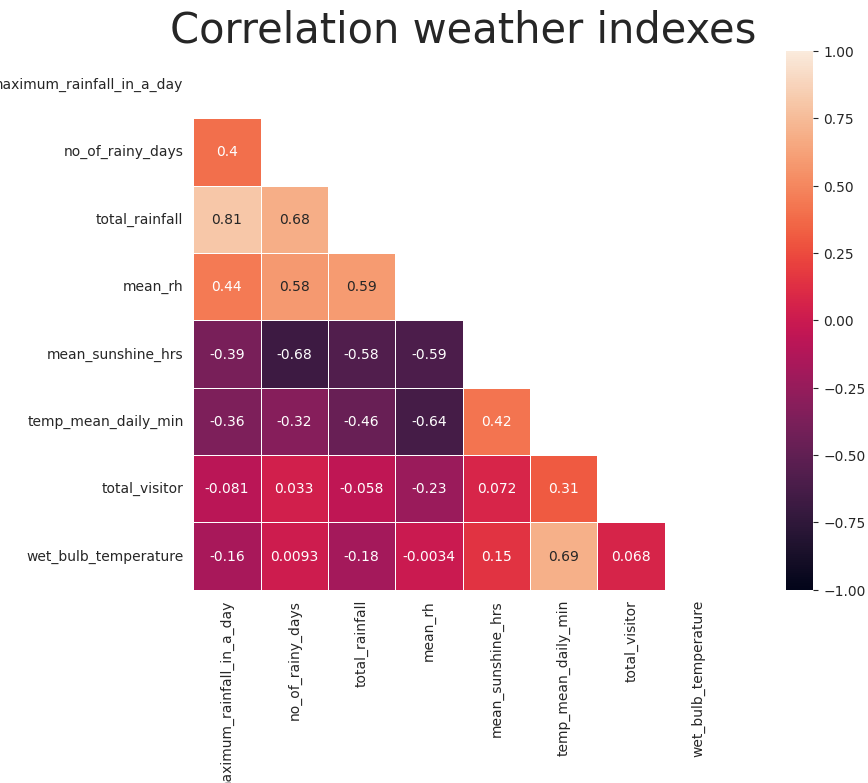

In [39]:
plt.figure(figsize = (14,7))

corr = comb_month.corr(numeric_only=1)


mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)
    plt.title("Correlation weather indexes", fontsize = 30)

###### The heat map of coorelation between variables show some degree of relationship, one in particular looks like strong relationship
    Positive correlation (correlation coefficient > 0.5):
        - Total rainfall in a month v.s. Average monthly max rainfall in a day (0.81)
        - Wet bulb temperature v.s. Average air temperature (0.69)
        - Total rainfall in a month v.s. Number of rainy days in a month (0.68)
        - Total rainfall in a month v.s. Average relative humidity in a month (0.59)
        - Number of rainy days in a month v.s. Average relative humidity in a month (0.58)
    Negative correlation (correlation coefficient < -05):
        - Number of sunshine hours in a month v.s. Number of rainy days in a month (-0.68)
        - Average relative humidity in a month v.s. Average air temperature (-0.64)
        - Number of sunshine hours in a month v.s. Average relative humidity in a month (-0.59)
        - Number of sunshine hours in a month v.s. Total rainfall (-0.58)

2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.

Text(0.5, 1.0, 'Distribution of average wet bulb temperature')

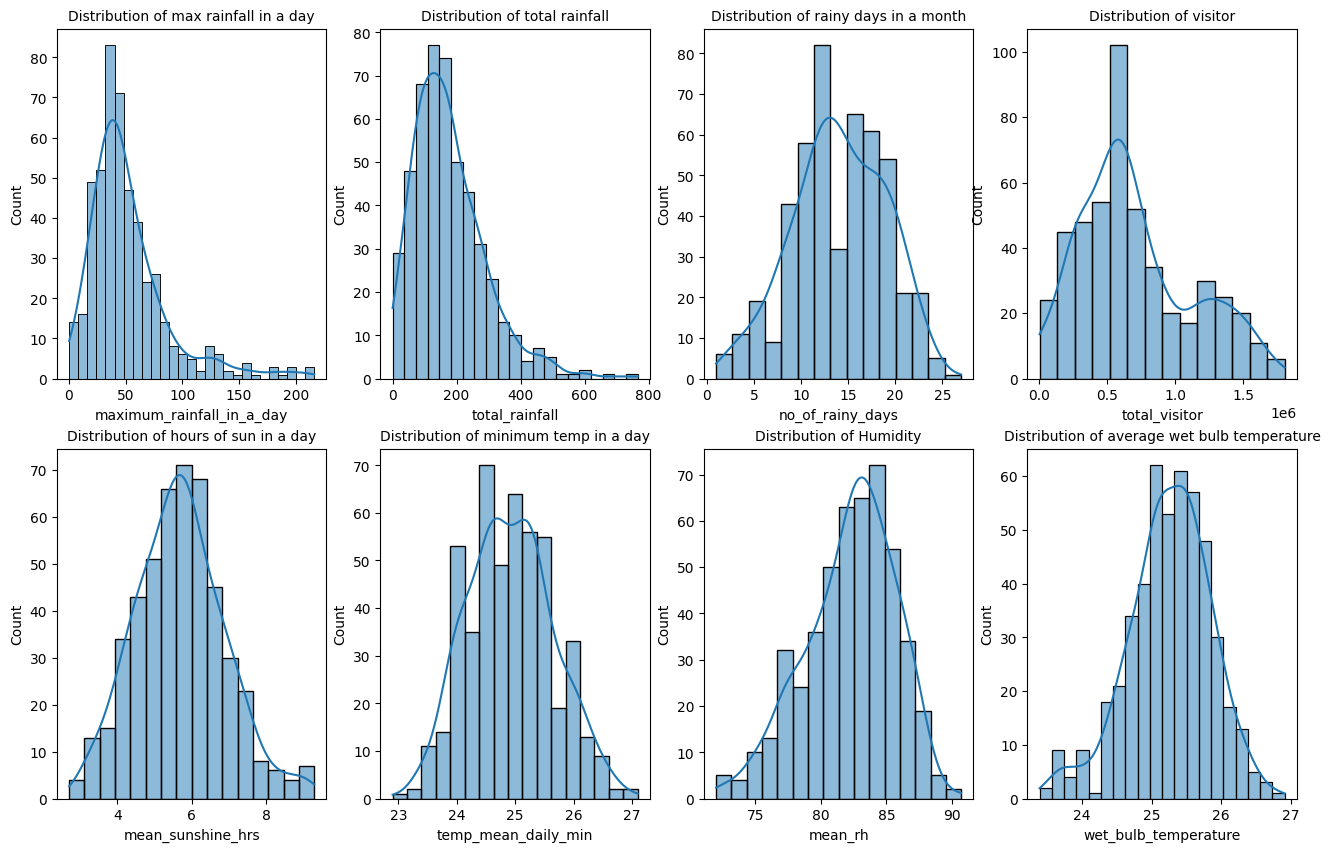

In [40]:
# histogram of comb_month and subplots
plt.figure(figsize = (16,10))
plt.subplot(2,4,1)
sns.histplot(comb_month['maximum_rainfall_in_a_day'], kde = True)
plt.title("Distribution of max rainfall in a day", fontsize = 10)
plt.subplot(2,4,2)
sns.histplot(comb_month['total_rainfall'], kde = True)
plt.title("Distribution of total rainfall", fontsize = 10)
plt.subplot(2,4,3)
sns.histplot(comb_month['no_of_rainy_days'], kde = True)
plt.title("Distribution of rainy days in a month", fontsize = 10)
plt.subplot(2,4,4)
sns.histplot(comb_month['total_visitor'], kde = True)
plt.title("Distribution of visitor", fontsize = 10)
plt.subplot(2,4,5)
sns.histplot(comb_month['mean_sunshine_hrs'], kde = True)
plt.title("Distribution of hours of sun in a day", fontsize = 10)
plt.subplot(2,4,6)
sns.histplot(comb_month['temp_mean_daily_min'], kde = True)
plt.title("Distribution of minimum temp in a day", fontsize = 10)
plt.subplot(2,4,7)
sns.histplot(comb_month['mean_rh'], kde = True)
plt.title("Distribution of Humidity", fontsize = 10)
plt.subplot(2,4,8)
sns.histplot(comb_month['wet_bulb_temperature'], kde = True)
plt.title("Distribution of average wet bulb temperature", fontsize = 10)


### strong correlation reflect in similarity of distribution shape

From the first heatmap, there are 9 pairs of these data where magnitude of correlation coeficient is more than 0.5. The distribution of these data are similar to each other. The distribution of these data are right skewed, which means the mean is greater than the median. This is because the mean is sensitive to outliers and the median is not. The outliers in these data are the months with heavy rain fall. The mean of these data are greater than the median. The distribution of these data are not normal distribution. This will affect the estimate made from these data.

3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels

In [41]:

# plt.figure(figsize = (16,9))
# plt.subplot(2,4,1)
# sns.boxplot(comb_month['maximum_rainfall_in_a_day'])
# plt.subplot(2,4,2)
# sns.boxplot(comb_month['no_of_rainy_days'])
# plt.subplot(2,4,3)
# sns.boxplot(comb_month['total_rainfall'])
# plt.subplot(2,4,4)
# sns.boxplot(comb_month['mean_rh'])
# plt.subplot(2,4,5)
# sns.boxplot(comb_month['mean_sunshine_hrs'])
# plt.subplot(2,4,6)
# sns.boxplot(comb_month['temp_mean_daily_min'])
# plt.subplot(2,4,7)
# sns.boxplot(comb_month['total_visitor'])
# plt.subplot(2,4,8)
# sns.boxplot(comb_month['wet_bulb_temperature'])


Text(0.5, 1.0, 'Air temperature and Wet bulb temperature')

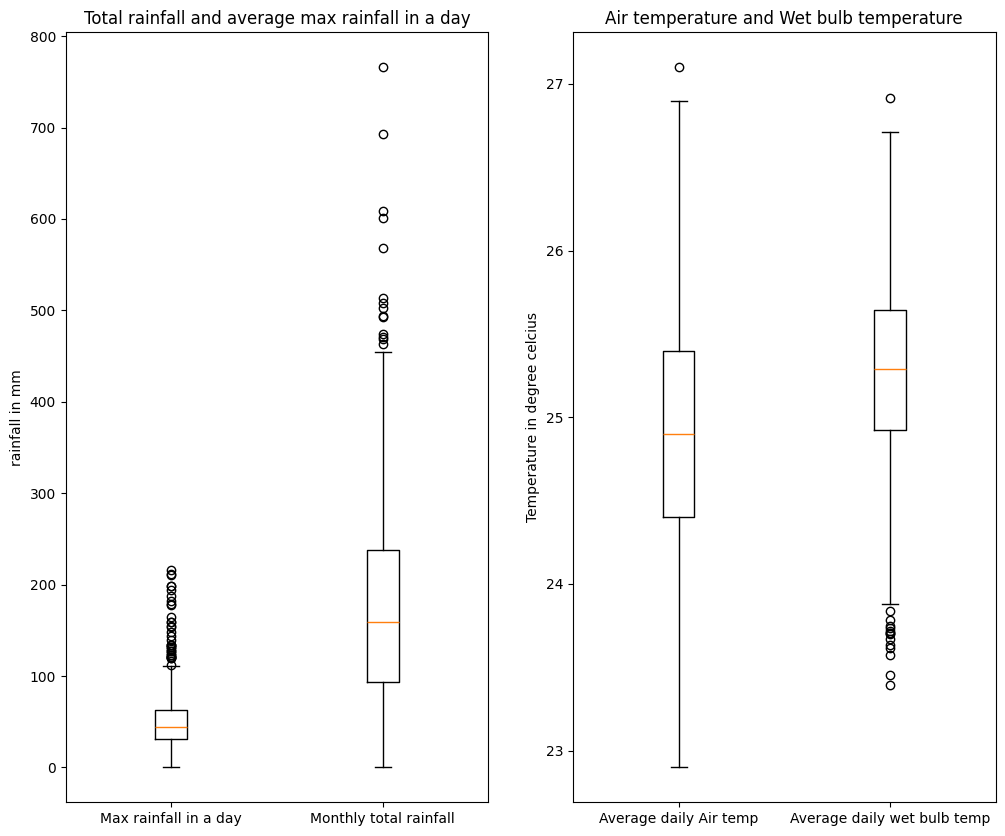

In [42]:
# create grouped boxplot using matplotlib
plt.figure(figsize = (12,10))
plt.subplot(1,2,1)
plt.boxplot([comb_month['maximum_rainfall_in_a_day'], comb_month['total_rainfall']]);
plt.xticks([1,2],['Max rainfall in a day', 'Monthly total rainfall'])
plt.ylabel('rainfall in mm')
plt.title('Total rainfall and average max rainfall in a day')
plt.subplot(1,2,2)
plt.boxplot([comb_month['temp_mean_daily_min'], comb_month['wet_bulb_temperature']]);
plt.xticks([1,2],['Average daily Air temp', 'Average daily wet bulb temp'])
plt.ylabel('Temperature in degree celcius')
plt.title('Air temperature and Wet bulb temperature')




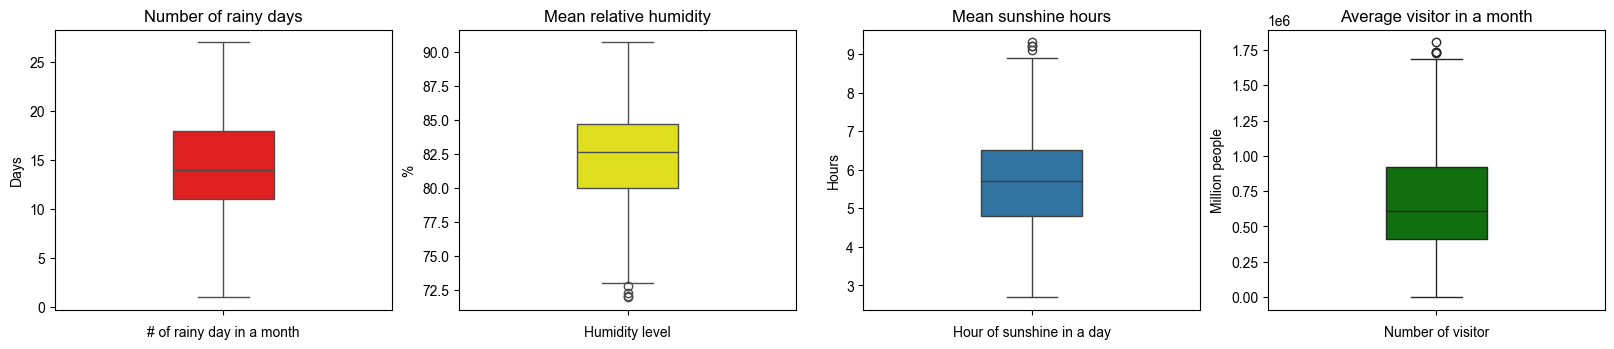

In [43]:
# plot boxplot using seaborn and edit x label and y label
plt.figure(figsize = (20,8))

# plt.xticks([0,1],['Max rainfall in a day', 'Monthly total rainfall'])
# plt.ylabel('rainfall in mm')


plt.subplot(2,4,1)
sns.boxplot(comb_month['no_of_rainy_days'], width=0.3, color='red').set(xlabel='# of rainy day in a month', ylabel='Days', title='Number of rainy days')
plt.subplot(2,4,2)
sns.boxplot(comb_month['mean_rh'],width=0.3, color='yellow').set(xlabel='Humidity level', ylabel='%', title='Mean relative humidity')
plt.subplot(2,4,3)
sns.boxplot(comb_month['mean_sunshine_hrs'], width=0.3).set(xlabel='Hour of sunshine in a day', ylabel='Hours', title='Mean sunshine hours')
plt.subplot(2,4,4)
sns.boxplot(comb_month['total_visitor'], width=0.3, color='green').set(xlabel='Number of visitor', ylabel='Million people', title='Average visitor in a month')
sns.set_style('whitegrid')



The processed data contain 488 rows of data (488 months of weather record). Most of them have no outliner, except for the total upper outlier in the total rainfall in a month that looks significant (outlier data is 8% of total dateset).
They also confirms the outliers found from filering (masking) data in the previous step.

4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable

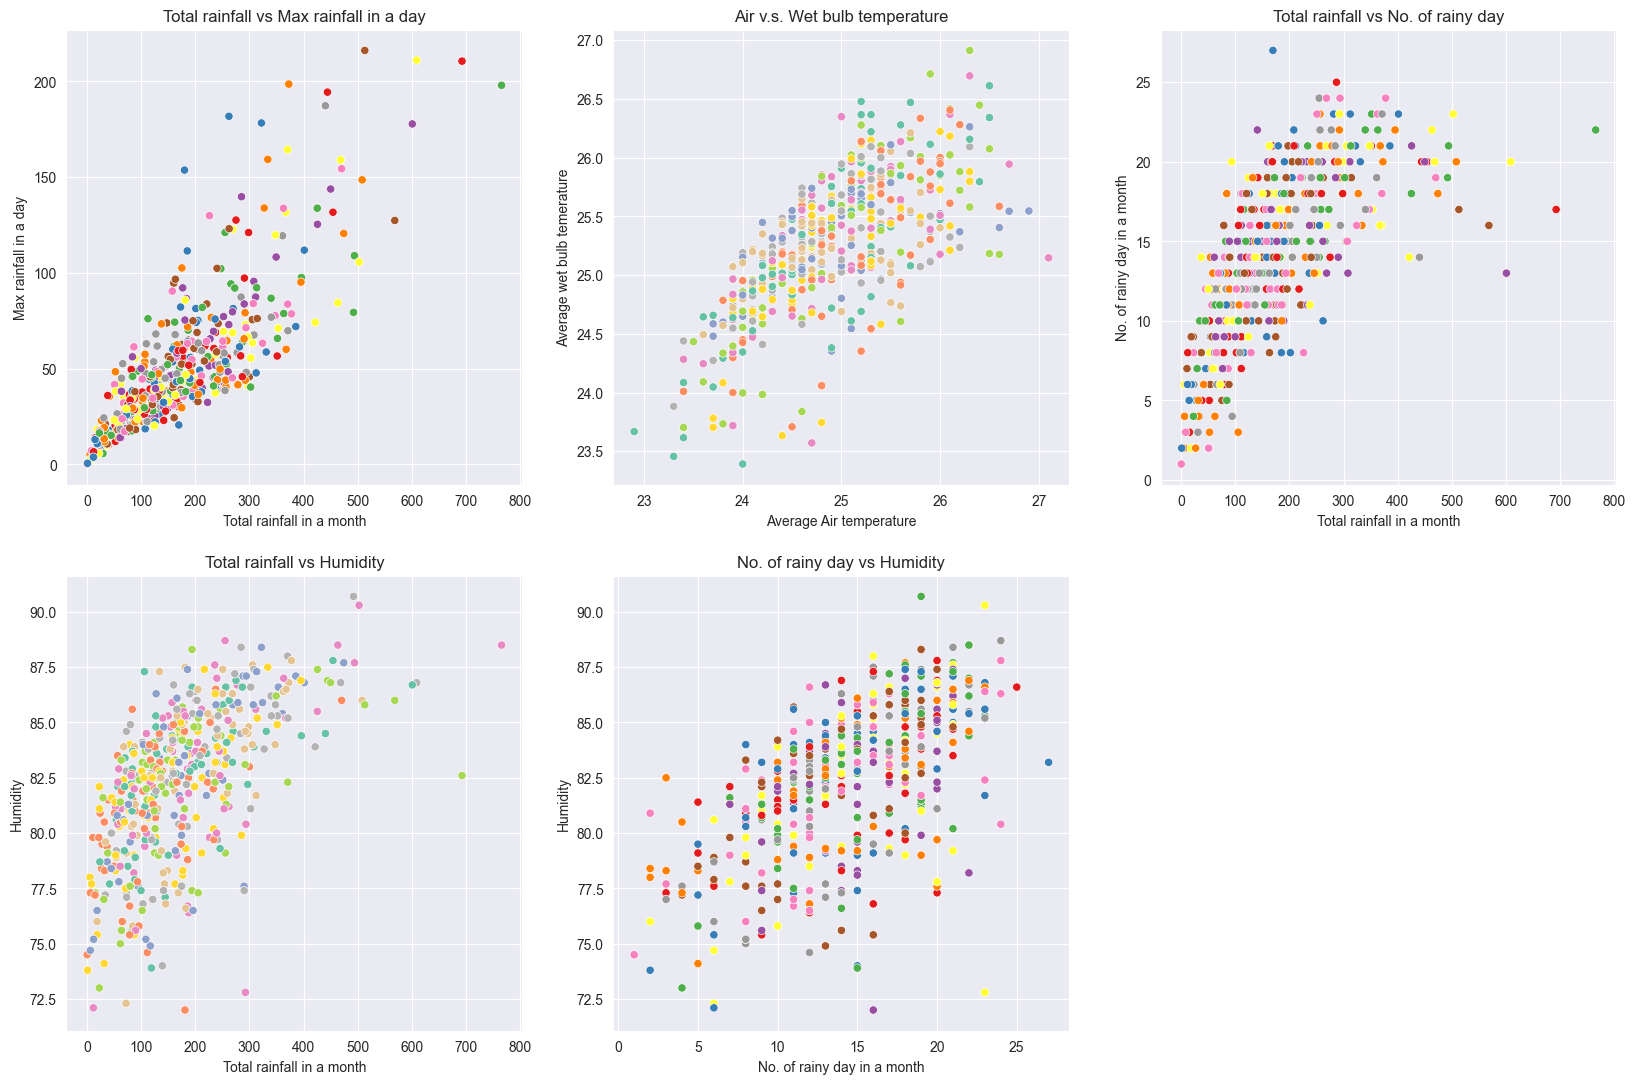

In [44]:
# Positive correlation efficient
plt.figure(figsize = (20,13))
sns.set_style('darkgrid')
plt.subplot(2,3,1)
sns.scatterplot(data = comb_month, x = 'total_rainfall', y = 'maximum_rainfall_in_a_day', hue = 'month', palette = 'Set1', legend=False).set(xlabel='Total rainfall in a month', ylabel='Max rainfall in a day', title='Total rainfall vs Max rainfall in a day')
plt.subplot(2,3,2)
sns.scatterplot(data = comb_month, x = 'temp_mean_daily_min', y = 'wet_bulb_temperature', hue = 'month', palette = 'Set2', legend=False).set(xlabel='Average Air temperature', ylabel='Average wet bulb temerature', title='Air v.s. Wet bulb temperature')
plt.subplot(2,3,3)
sns.scatterplot(data = comb_month, x = 'total_rainfall', y = 'no_of_rainy_days', hue = 'month', palette = 'Set1', legend=False).set(xlabel='Total rainfall in a month', ylabel='No. of rainy day in a month', title='Total rainfall vs No. of rainy day')
plt.subplot(2,3,4)
sns.scatterplot(data = comb_month, x = 'total_rainfall', y = 'mean_rh', hue = 'month', palette = 'Set2', legend=False).set(xlabel='Total rainfall in a month', ylabel='Humidity', title='Total rainfall vs Humidity')
plt.subplot(2,3,5)
sns.scatterplot(data = comb_month, x = 'no_of_rainy_days', y = 'mean_rh', hue = 'month', palette = 'Set1', legend=False).set(xlabel='No. of rainy day in a month', ylabel='Humidity', title='No. of rainy day vs Humidity') ;

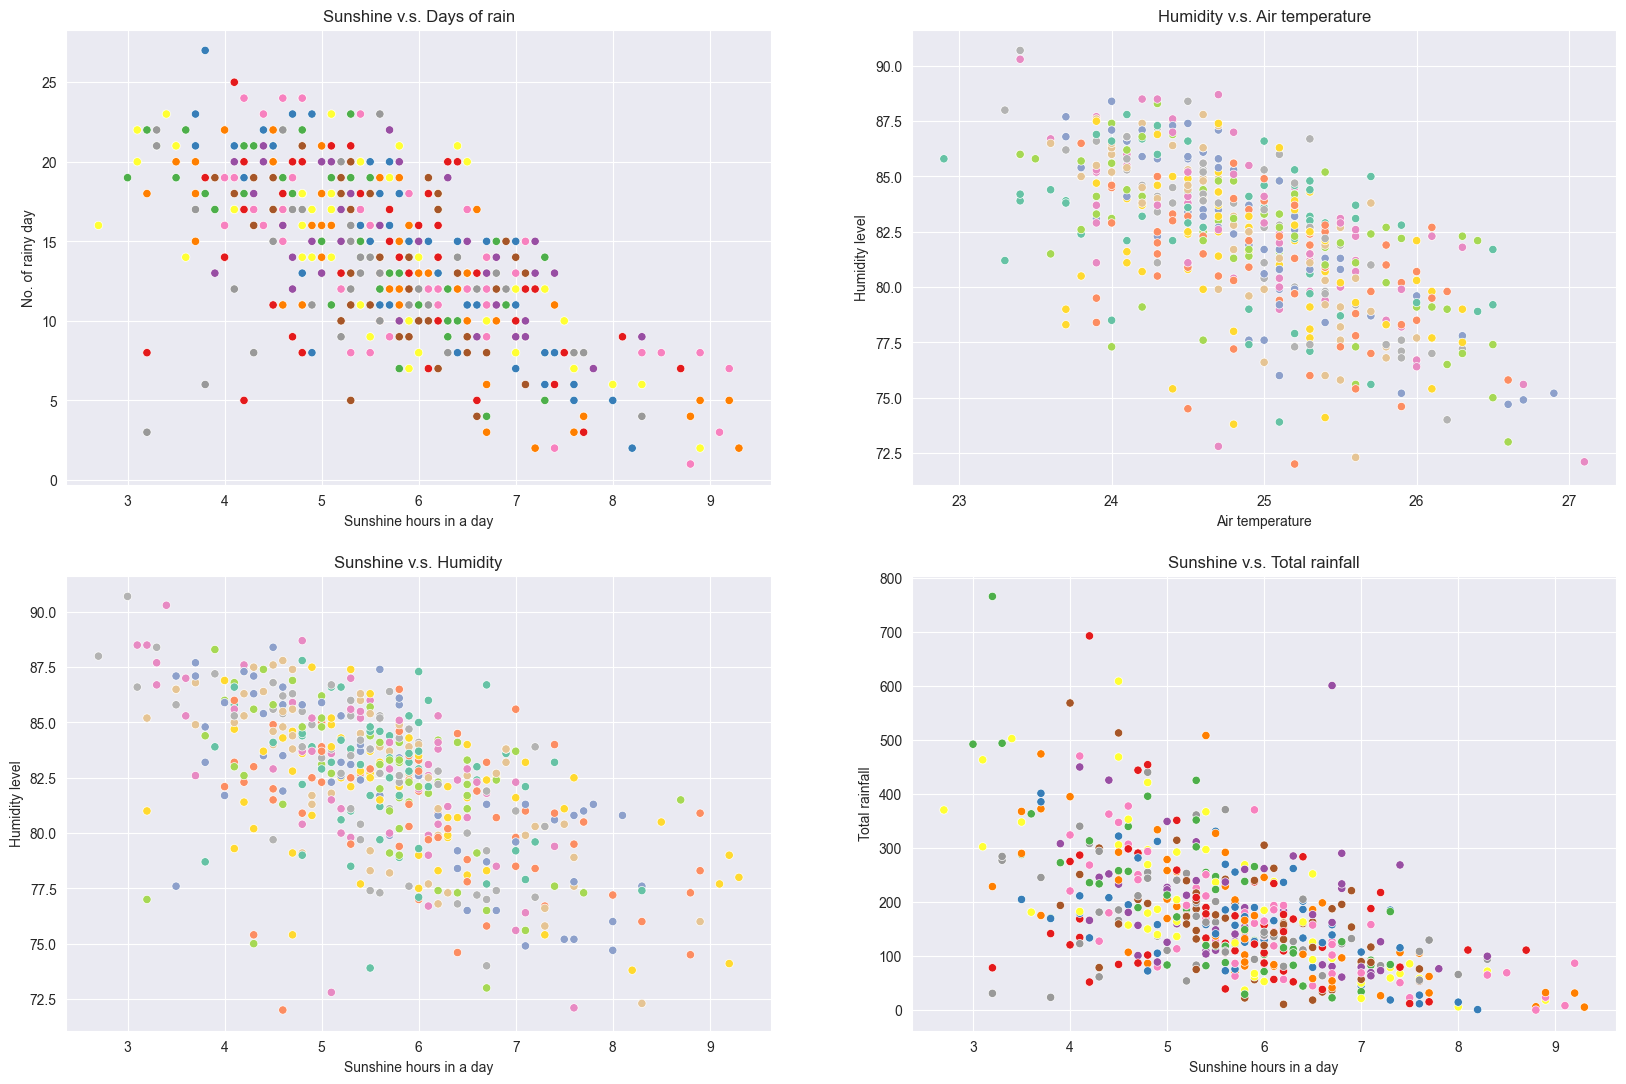

In [45]:
# Negative correlation efficient
plt.figure(figsize = (20,13))
sns.set_style('darkgrid')
plt.subplot(2,2,1)
sns.scatterplot(data = comb_month, x = 'mean_sunshine_hrs', y = 'no_of_rainy_days', hue = 'month', palette = 'Set1', legend=False).set(xlabel='Sunshine hours in a day', ylabel='No. of rainy day', title='Sunshine v.s. Days of rain')
plt.subplot(2,2,2)
sns.scatterplot(data = comb_month, x = 'temp_mean_daily_min', y = 'mean_rh', hue = 'month', palette = 'Set2', legend=False).set(xlabel='Air temperature', ylabel='Humidity level', title='Humidity v.s. Air temperature')
plt.subplot(2,2,3)
sns.scatterplot(data = comb_month, x = 'mean_sunshine_hrs', y = 'mean_rh', hue = 'month', palette = 'Set2', legend=False).set(xlabel='Sunshine hours in a day', ylabel='Humidity level', title='Sunshine v.s. Humidity')
plt.subplot(2,2,4)
sns.scatterplot(data = comb_month, x = 'mean_sunshine_hrs', y = 'total_rainfall', hue = 'month', palette = 'Set1', legend=False).set(xlabel='Sunshine hours in a day', ylabel='Total rainfall', title='Sunshine v.s. Total rainfall') ;

5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

### Visitor doesn't visit more at lowest rainfall
there is no relation between rain related factor and visitor coming to Singapore.
The correlation between the number of visitors are very steady in each month of year. Where the rain and weather related factor have it seasonal.

Boxplot below show the insignificant number of visitor in different month of year.

C:\Users\ponpa\AppData\Local\Temp\ipykernel_5768\1070357133.py:4: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['total_rainfall'], color='yellow', scale=0.5).set(xlabel= '', ylabel='Average rainfall', title='Total rainfall throughout the year')
C:\Users\ponpa\AppData\Local\Temp\ipykernel_5768\1070357133.py:8: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['total_visitor'], color='orange', scale=0.5).set(xlabel='Month', ylabel='Number visitor', title='Visitor');


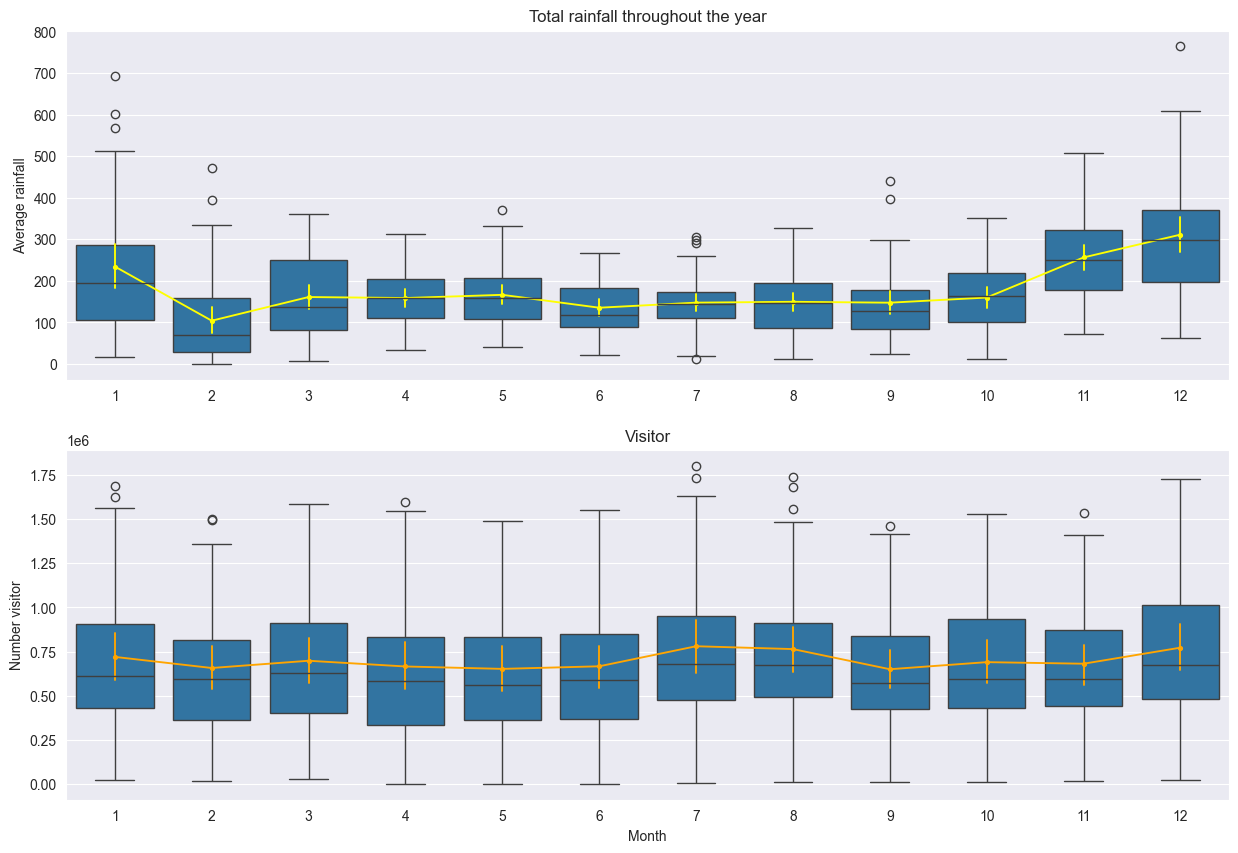

In [81]:
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
sns.boxplot(x=comb_month['month'].dt.month, y=comb_month['total_rainfall'])
sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['total_rainfall'], color='yellow', scale=0.5).set(xlabel= '', ylabel='Average rainfall', title='Total rainfall throughout the year')
plt.subplot(2,1,2)
custom_palette = sns.color_palette("Set1", 12)
sns.boxplot(x=comb_month['month'].dt.month, y=comb_month['total_visitor'])
sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['total_visitor'], color='orange', scale=0.5).set(xlabel='Month', ylabel='Number visitor', title='Visitor');

C:\Users\ponpa\AppData\Local\Temp\ipykernel_5768\4007327752.py:4: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['mean_sunshine_hrs'], color='black', scale=0.5).set(xlabel= '', ylabel='Sunshine hour in a day', title='Number of sunshine in a day')
C:\Users\ponpa\AppData\Local\Temp\ipykernel_5768\4007327752.py:8: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['temp_mean_daily_min'], color='red', scale=0.5).set(xlabel='Month', ylabel='Average lowest temperature', title='Lowest temperature')


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Average lowest temperature'),
 Text(0.5, 1.0, 'Lowest temperature')]

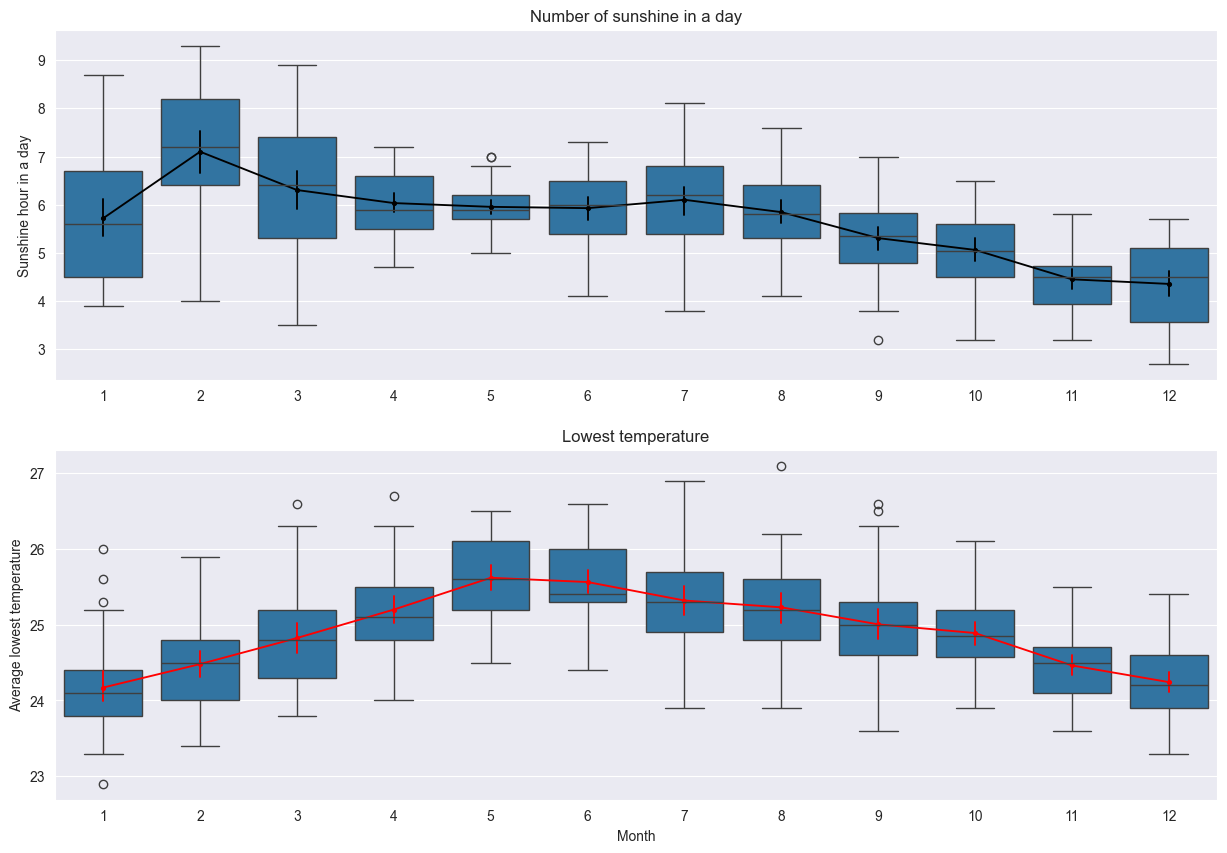

In [77]:
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
sns.boxplot(x=comb_month['month'].dt.month, y=comb_month['mean_sunshine_hrs'])
sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['mean_sunshine_hrs'], color='black', scale=0.5).set(xlabel= '', ylabel='Sunshine hour in a day', title='Number of sunshine in a day')
plt.subplot(2,1,2)
custom_palette = sns.color_palette("Set1", 12)
sns.boxplot(x=comb_month['month'].dt.month, y=comb_month['temp_mean_daily_min'])
sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['temp_mean_daily_min'], color='red', scale=0.5).set(xlabel='Month', ylabel='Average lowest temperature', title='Lowest temperature')

C:\Users\ponpa\AppData\Local\Temp\ipykernel_5768\1773229123.py:4: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['total_rainfall'], color='yellow', scale=0.5).set(xlabel= '', ylabel='Average rainfall', title='Total rainfall throughout the year')
C:\Users\ponpa\AppData\Local\Temp\ipykernel_5768\1773229123.py:8: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['no_of_rainy_days'], color='orange', scale=0.5).set(xlabel='Month', ylabel='Number of raining day', title='Average number of raining day')


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Number of raining day'),
 Text(0.5, 1.0, 'Average number of raining day')]

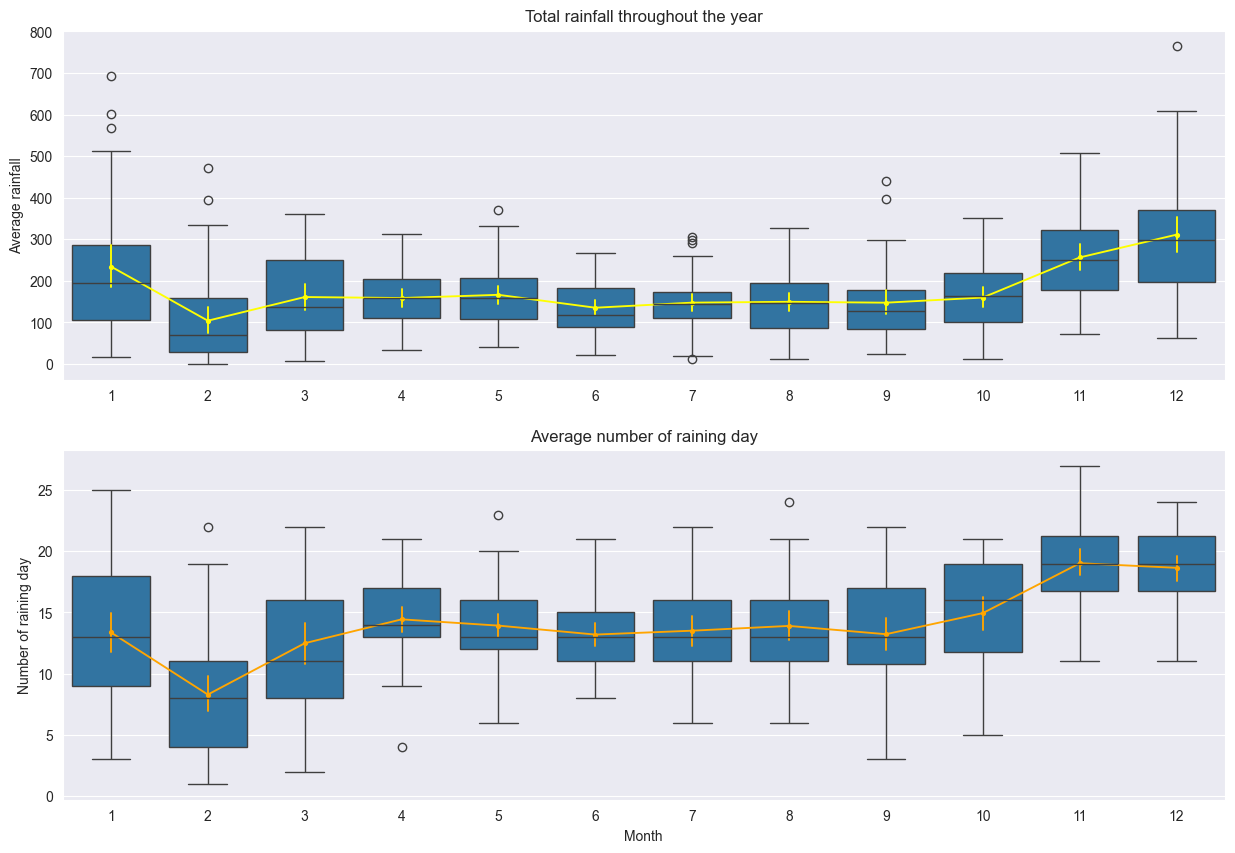

In [79]:
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
sns.boxplot(x=comb_month['month'].dt.month, y=comb_month['total_rainfall'])
sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['total_rainfall'], color='yellow', scale=0.5).set(xlabel= '', ylabel='Average rainfall', title='Total rainfall throughout the year')
plt.subplot(2,1,2)
custom_palette = sns.color_palette("Set1", 12)
sns.boxplot(x=comb_month['month'].dt.month, y=comb_month['no_of_rainy_days'])
sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['no_of_rainy_days'], color='orange', scale=0.5).set(xlabel='Month', ylabel='Number of raining day', title='Average number of raining day')

C:\Users\ponpa\AppData\Local\Temp\ipykernel_5768\2533479256.py:4: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['total_rainfall'], color='red', scale=0.5)


<Axes: xlabel='month', ylabel='total_rainfall'>

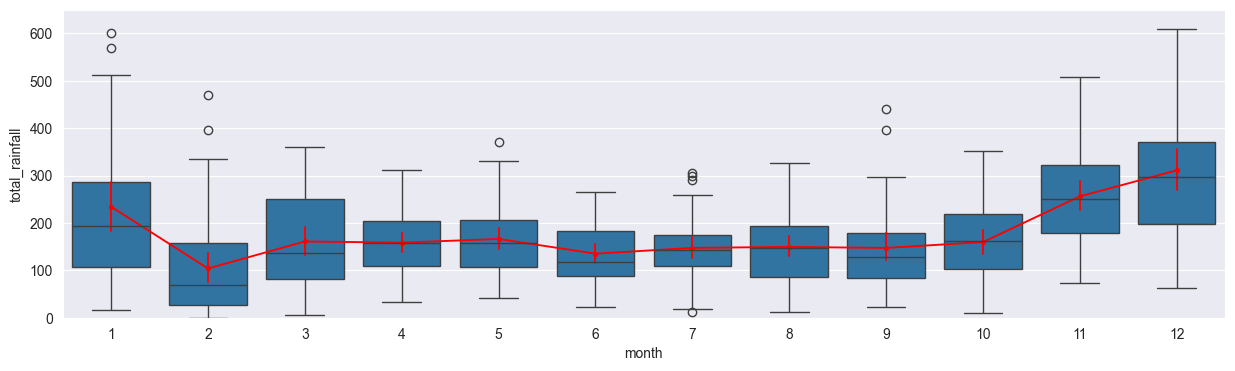

In [47]:
plt.figure(figsize = (15,4))
sns.boxplot(x=comb_month['month'].dt.month, y=comb_month['total_rainfall'])
plt.ylim(0, 650)
sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['total_rainfall'], color='red', scale=0.5)

C:\Users\ponpa\AppData\Local\Temp\ipykernel_5768\3561873633.py:4: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['no_of_rainy_days'], color='blue', scale=0.5)
C:\Users\ponpa\AppData\Local\Temp\ipykernel_5768\3561873633.py:7: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['total_rainfall'], color='red', scale=0.5)


<Axes: xlabel='month', ylabel='total_rainfall'>

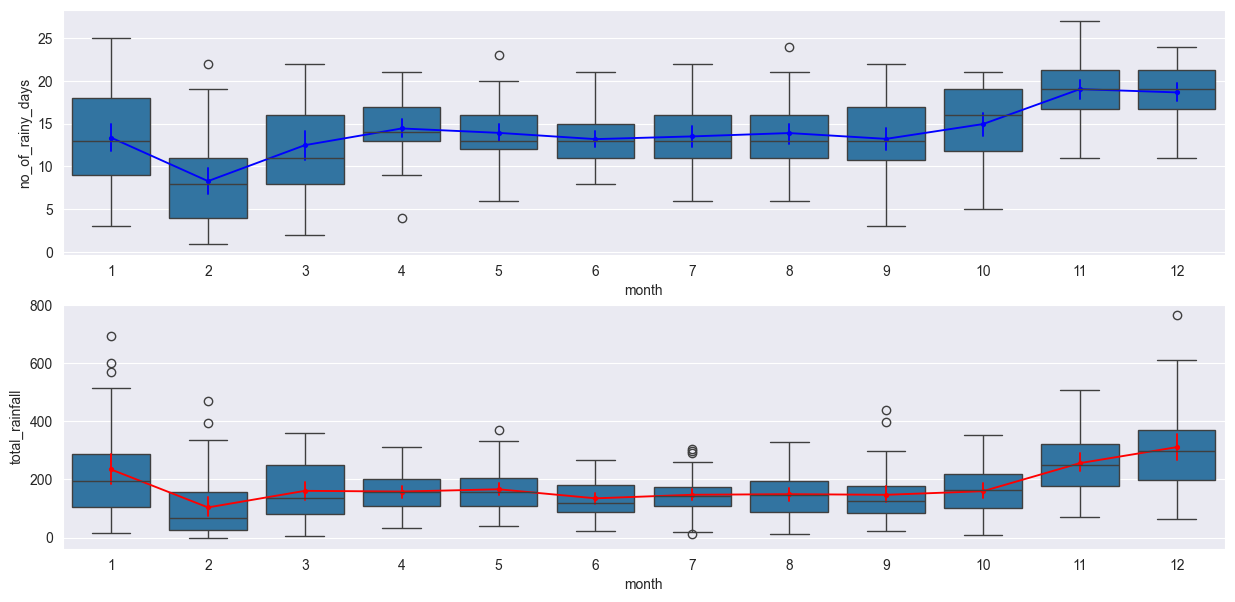

In [48]:
plt.figure(figsize = (15,7))
plt.subplot(2,1,1)
sns.boxplot(x=comb_month['month'].dt.month, y=comb_month['no_of_rainy_days'])
sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['no_of_rainy_days'], color='blue', scale=0.5)
plt.subplot(2,1,2)
sns.boxplot(x=comb_month['month'].dt.month, y=comb_month['total_rainfall'])
sns.pointplot(x=comb_month['month'].dt.month, y=comb_month['total_rainfall'], color='red', scale=0.5)

C:\Users\ponpa\AppData\Local\Temp\ipykernel_5768\1912636306.py:5: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x = comb_month['month'].dt.month, y = comb_month['total_rainfall'], color='red', scale=0.5)
C:\Users\ponpa\AppData\Local\Temp\ipykernel_5768\1912636306.py:8: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x = comb_month['month'].dt.month, y = comb_month['mean_rh'], color='blue', scale=0.5)
C:\Users\ponpa\AppData\Local\Temp\ipykernel_5768\1912636306.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` paramete

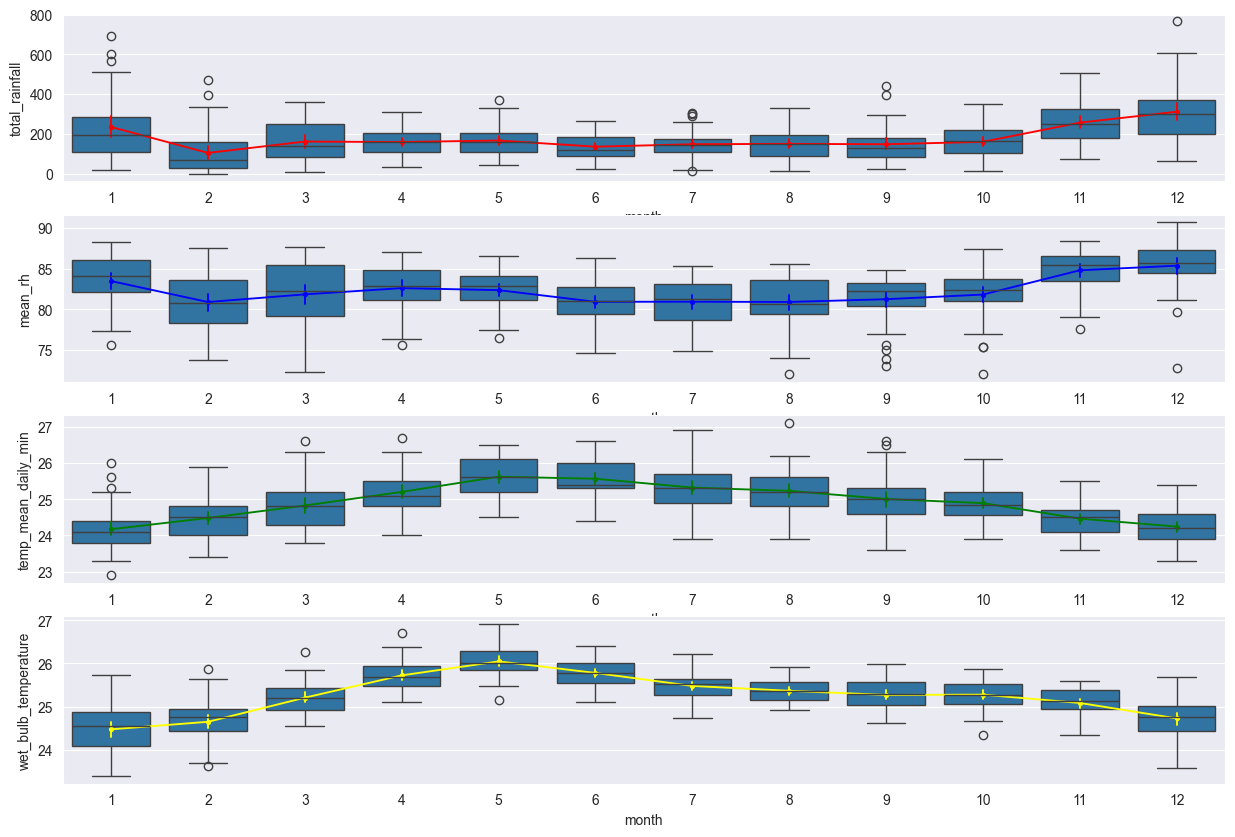

In [49]:
# Max rain in a day by month
plt.figure(figsize = (15,10))
plt.subplot(4,1,1)
sns.boxplot(x = comb_month['month'].dt.month, y = comb_month['total_rainfall'])
sns.pointplot(x = comb_month['month'].dt.month, y = comb_month['total_rainfall'], color='red', scale=0.5)
plt.subplot(4,1,2)
sns.boxplot(x = comb_month['month'].dt.month, y = comb_month['mean_rh'])
sns.pointplot(x = comb_month['month'].dt.month, y = comb_month['mean_rh'], color='blue', scale=0.5)
plt.subplot(4,1,3)
sns.boxplot(x = comb_month['month'].dt.month, y = comb_month['temp_mean_daily_min'])
sns.pointplot(x = comb_month['month'].dt.month, y = comb_month['temp_mean_daily_min'], color='green', scale=0.5)
plt.subplot(4,1,4)
sns.boxplot(x = comb_month['month'].dt.month, y = comb_month['wet_bulb_temperature'])
sns.pointplot(x = comb_month['month'].dt.month, y = comb_month['wet_bulb_temperature'], color='yellow', scale=0.5);



In [50]:
# Add 3 columns to wet_bulb dataframe to be used as index for day, month and year
wet_bulb['month'] = wet_bulb['wbt_date'].dt.month
wet_bulb['day'] = wet_bulb['wbt_date'].dt.day
wet_bulb['year'] = wet_bulb['wbt_date'].dt.year
wet_bulb.head()

,wbt_date,wbt_time,wet_bulb_temperature,month,day,year
0,1982-01-01,1,24.7,1,1,1982
1,1982-01-01,2,24.5,1,1,1982
2,1982-01-01,3,24.3,1,1,1982
3,1982-01-01,4,24.2,1,1,1982
4,1982-01-01,5,24.2,1,1,1982


In [51]:
# Create month list than contain max wet bulb temperature of each day. List of hour (where temp is max), and the max temp daily for January
month_select = 1
jan_hour_list = []
jan_temp_list = []
for i in range(1,32):
    for j in range(1982,2024):
        jan_hour_list.append(wet_bulb['wbt_time'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())].values)
        jan_temp_list.append(wet_bulb['wet_bulb_temperature'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())])

jan_hour_list = [item for sublist in jan_hour_list for item in sublist]
jan_temp_list = [item for sublist in jan_temp_list for item in sublist]

In [52]:
# Create month list than contain max wet bulb temperature of each day. List of hour (where temp is max), and the max temp daily for Feb
month_select = 2
feb_hour_list = []
feb_temp_list = []
for i in range(1,32):
    for j in range(1982,2024):
        feb_hour_list.append(wet_bulb['wbt_time'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())].values)
        feb_temp_list.append(wet_bulb['wet_bulb_temperature'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())])

feb_hour_list = [item for sublist in feb_hour_list for item in sublist]
feb_temp_list = [item for sublist in feb_temp_list for item in sublist]

In [53]:
# Create month list than contain max wet bulb temperature of each day. List of hour (where temp is max), and the max temp daily for Mar
month_select = 3
mar_hour_list = []
mar_temp_list = []
for i in range(1,32):
    for j in range(1982,2024):
        mar_hour_list.append(wet_bulb['wbt_time'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())].values)
        mar_temp_list.append(wet_bulb['wet_bulb_temperature'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())])

mar_hour_list = [item for sublist in mar_hour_list for item in sublist]
mar_temp_list = [item for sublist in mar_temp_list for item in sublist]

In [54]:
# Create month list than contain max wet bulb temperature of each day. List of hour (where temp is max), and the max temp daily for Apr
month_select = 4
apr_hour_list = []
apr_temp_list = []
for i in range(1,32):
    for j in range(1982,2024):
        apr_hour_list.append(wet_bulb['wbt_time'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())].values)
        apr_temp_list.append(wet_bulb['wet_bulb_temperature'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())])

apr_hour_list = [item for sublist in apr_hour_list for item in sublist]
apr_temp_list = [item for sublist in apr_temp_list for item in sublist]

In [55]:
# Create month list than contain max wet bulb temperature of each day. List of hour (where temp is max), and the max temp daily for may
month_select = 5
may_hour_list = []
may_temp_list = []
for i in range(1,32):
    for j in range(1982,2024):
        may_hour_list.append(wet_bulb['wbt_time'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())].values)
        may_temp_list.append(wet_bulb['wet_bulb_temperature'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())])

may_hour_list = [item for sublist in may_hour_list for item in sublist]
may_temp_list = [item for sublist in may_temp_list for item in sublist]

In [56]:
# Create month list than contain max wet bulb temperature of each day. List of hour (where temp is max), and the max temp daily for jun
month_select = 6
jun_hour_list = []
jun_temp_list = []
for i in range(1,32):
    for j in range(1982,2024):
        jun_hour_list.append(wet_bulb['wbt_time'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())].values)
        jun_temp_list.append(wet_bulb['wet_bulb_temperature'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())])

jun_hour_list = [item for sublist in jun_hour_list for item in sublist]
jun_temp_list = [item for sublist in jun_temp_list for item in sublist]

In [57]:
# Create month list than contain max wet bulb temperature of each day. List of hour (where temp is max), and the max temp daily for jul
month_select = 7
jul_hour_list = []
jul_temp_list = []
for i in range(1,32):
    for j in range(1982,2024):
        jul_hour_list.append(wet_bulb['wbt_time'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())].values)
        jul_temp_list.append(wet_bulb['wet_bulb_temperature'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())])

jul_hour_list = [item for sublist in jul_hour_list for item in sublist]
jul_temp_list = [item for sublist in jul_temp_list for item in sublist]

In [58]:
# Create month list than contain max wet bulb temperature of each day. List of hour (where temp is max), and the max temp daily for aug
month_select = 8
aug_hour_list = []
aug_temp_list = []
for i in range(1,32):
    for j in range(1982,2024):
        aug_hour_list.append(wet_bulb['wbt_time'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())].values)
        aug_temp_list.append(wet_bulb['wet_bulb_temperature'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())])

aug_hour_list = [item for sublist in aug_hour_list for item in sublist]
aug_temp_list = [item for sublist in aug_temp_list for item in sublist]

In [59]:
# Create month list than contain max wet bulb temperature of each day. List of hour (where temp is max), and the max temp daily for sep
month_select = 9
sep_hour_list = []
sep_temp_list = []
for i in range(1,32):
    for j in range(1982,2024):
        sep_hour_list.append(wet_bulb['wbt_time'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())].values)
        sep_temp_list.append(wet_bulb['wet_bulb_temperature'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())])

sep_hour_list = [item for sublist in sep_hour_list for item in sublist]
sep_temp_list = [item for sublist in sep_temp_list for item in sublist]

In [60]:
# Create month list than contain max wet bulb temperature of each day. List of hour (where temp is max), and the max temp daily for oct
month_select = 10
oct_hour_list = []
oct_temp_list = []
for i in range(1,32):
    for j in range(1982,2024):
        oct_hour_list.append(wet_bulb['wbt_time'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())].values)
        oct_temp_list.append(wet_bulb['wet_bulb_temperature'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())])

oct_hour_list = [item for sublist in oct_hour_list for item in sublist]
oct_temp_list = [item for sublist in oct_temp_list for item in sublist]

In [61]:
# Create month list than contain max wet bulb temperature of each day. List of hour (where temp is max), and the max temp daily for nov
month_select = 11
nov_hour_list = []
nov_temp_list = []
for i in range(1,32):
    for j in range(1982,2024):
        nov_hour_list.append(wet_bulb['wbt_time'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())].values)
        nov_temp_list.append(wet_bulb['wet_bulb_temperature'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())])

nov_hour_list = [item for sublist in nov_hour_list for item in sublist]
nov_temp_list = [item for sublist in nov_temp_list for item in sublist]

In [62]:
# Create month list than contain max wet bulb temperature of each day. List of hour (where temp is max), and the max temp daily for dec
month_select = 12
dec_hour_list = []
dec_temp_list = []
for i in range(1,32):
    for j in range(1982,2024):
        dec_hour_list.append(wet_bulb['wbt_time'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())].values)
        dec_temp_list.append(wet_bulb['wet_bulb_temperature'][(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select) &(wet_bulb['day'] == i) & (wet_bulb['wet_bulb_temperature'] == wet_bulb[(wet_bulb['wbt_date'].dt.year == j) & (wet_bulb['wbt_date'].dt.month == month_select)& (wet_bulb['day']==i)]['wet_bulb_temperature'].max())])

dec_hour_list = [item for sublist in dec_hour_list for item in sublist]
dec_temp_list = [item for sublist in dec_temp_list for item in sublist]

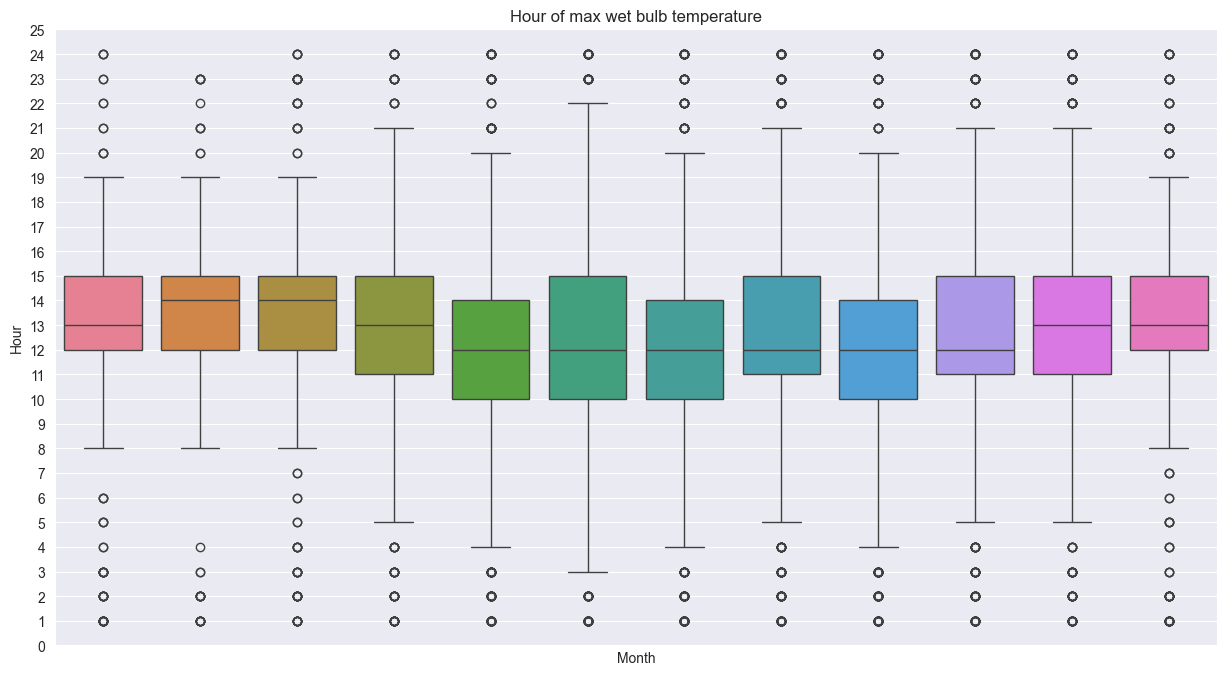

In [63]:
hour_each = [jan_hour_list, feb_hour_list, mar_hour_list, apr_hour_list, may_hour_list, jun_hour_list, jul_hour_list, aug_hour_list, sep_hour_list, oct_hour_list, nov_hour_list, dec_hour_list]
temp_each = [jan_temp_list, feb_temp_list, mar_temp_list, apr_temp_list, may_temp_list, jun_temp_list, jul_temp_list, aug_temp_list, sep_temp_list, oct_temp_list, nov_temp_list, dec_temp_list]


plt.figure(figsize = (15,8))

sns.boxplot(hour_each).set(xlabel='Month', ylabel='Hour', title='Hour of max wet bulb temperature', ylim=(0,24), xticks=np.arange(0, 0, 1.0))
plt.yticks(np.arange(0, 26, 1.0));


In [64]:
jan_hour_list = np.array(jan_hour_list)
jan_hour_list = jan_hour_list.astype(int)
jan_hour_list = np.sort(jan_hour_list)
jan_hour_list = jan_hour_list.tolist()
jan_hour_list = pd.Series(jan_hour_list)
jan_hour_list.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

print((20 - jan_hour_list.mean()) / jan_hour_list.std())



2.525876205321465


In [65]:
feb_hour_list = np.array(feb_hour_list)
feb_hour_list = feb_hour_list.astype(int)
feb_hour_list = np.sort(feb_hour_list)
feb_hour_list = feb_hour_list.tolist()
feb_hour_list = pd.Series(feb_hour_list)
feb_hour_list.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

print((20 - feb_hour_list.mean()) / feb_hour_list.std())


2.7751917000838953


In [66]:
mar_hour_list = np.array(mar_hour_list)
mar_hour_list = mar_hour_list.astype(int)
mar_hour_list = np.sort(mar_hour_list)
mar_hour_list = mar_hour_list.tolist()
mar_hour_list = pd.Series(mar_hour_list)
mar_hour_list.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

print((20 - mar_hour_list.mean()) / mar_hour_list.std())


2.3635094671674532


In [67]:
apr_hour_list = np.array(apr_hour_list)
apr_hour_list = apr_hour_list.astype(int)
apr_hour_list = np.sort(apr_hour_list)
apr_hour_list = apr_hour_list.tolist()
apr_hour_list = pd.Series(apr_hour_list)
apr_hour_list.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

print((20 - apr_hour_list.mean()) / apr_hour_list.std())


2.306722784179215


In [68]:
may_hour_list = np.array(may_hour_list)
may_hour_list = may_hour_list.astype(int)
may_hour_list = np.sort(may_hour_list)
may_hour_list = may_hour_list.tolist()
may_hour_list = pd.Series(may_hour_list)
may_hour_list.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

print((20 - may_hour_list.mean()) / may_hour_list.std())


2.021435698849148


In [69]:
jun_hour_list = np.array(jun_hour_list)
jun_hour_list = jun_hour_list.astype(int)
jun_hour_list = np.sort(jun_hour_list)
jun_hour_list = jun_hour_list.tolist()
jun_hour_list = pd.Series(jun_hour_list)
jun_hour_list.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

print((20 - jun_hour_list.mean()) / jun_hour_list.std())


1.838322246415547


In [70]:
jul_hour_list = np.array(jul_hour_list)
jul_hour_list = jul_hour_list.astype(int)
jul_hour_list = np.sort(jul_hour_list)
jul_hour_list = jul_hour_list.tolist()
jul_hour_list = pd.Series(jul_hour_list)
jul_hour_list.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

print((20 - jul_hour_list.mean()) / jul_hour_list.std())


1.9683299836081007


In [71]:
aug_hour_list = np.array(aug_hour_list)
aug_hour_list = aug_hour_list.astype(int)
aug_hour_list = np.sort(aug_hour_list)
aug_hour_list = aug_hour_list.tolist()
aug_hour_list = pd.Series(aug_hour_list)
aug_hour_list.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

print((20 - aug_hour_list.mean()) / aug_hour_list.std())


1.840147246618383


In [72]:
sep_hour_list = np.array(sep_hour_list)
sep_hour_list = sep_hour_list.astype(int)
sep_hour_list = np.sort(sep_hour_list)
sep_hour_list = sep_hour_list.tolist()
sep_hour_list = pd.Series(sep_hour_list)
sep_hour_list.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

print((20 - sep_hour_list.mean()) / sep_hour_list.std())


2.0127493007321147


In [73]:
oct_hour_list = np.array(oct_hour_list)
oct_hour_list = oct_hour_list.astype(int)
oct_hour_list = np.sort(oct_hour_list)
oct_hour_list = oct_hour_list.tolist()
oct_hour_list = pd.Series(oct_hour_list)
oct_hour_list.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

print((20 - oct_hour_list.mean()) / oct_hour_list.std())


1.9159625354665064


In [74]:
nov_hour_list = np.array(nov_hour_list)
nov_hour_list = nov_hour_list.astype(int)
nov_hour_list = np.sort(nov_hour_list)
nov_hour_list = nov_hour_list.tolist()
nov_hour_list = pd.Series(nov_hour_list)
nov_hour_list.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

print((20 - nov_hour_list.mean()) / nov_hour_list.std())


2.0047182956405916


In [75]:
dec_hour_list = np.array(dec_hour_list)
dec_hour_list = dec_hour_list.astype(int)
dec_hour_list = np.sort(dec_hour_list)
dec_hour_list = dec_hour_list.tolist()
dec_hour_list = pd.Series(dec_hour_list)
dec_hour_list.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

print((20 - dec_hour_list.mean()) / dec_hour_list.std())


2.1603173330843997


C:\Users\ponpa\AppData\Local\Temp\ipykernel_5768\3609104769.py:5: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x = comb_month['month'].dt.year, y = comb_month['no_of_rainy_days'], color='yellow', scale=0.5);


C:\Users\ponpa\AppData\Local\Temp\ipykernel_5768\3609104769.py:8: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x = comb_month['month'].dt.year, y = comb_month['total_rainfall'], color='red', scale=0.5);


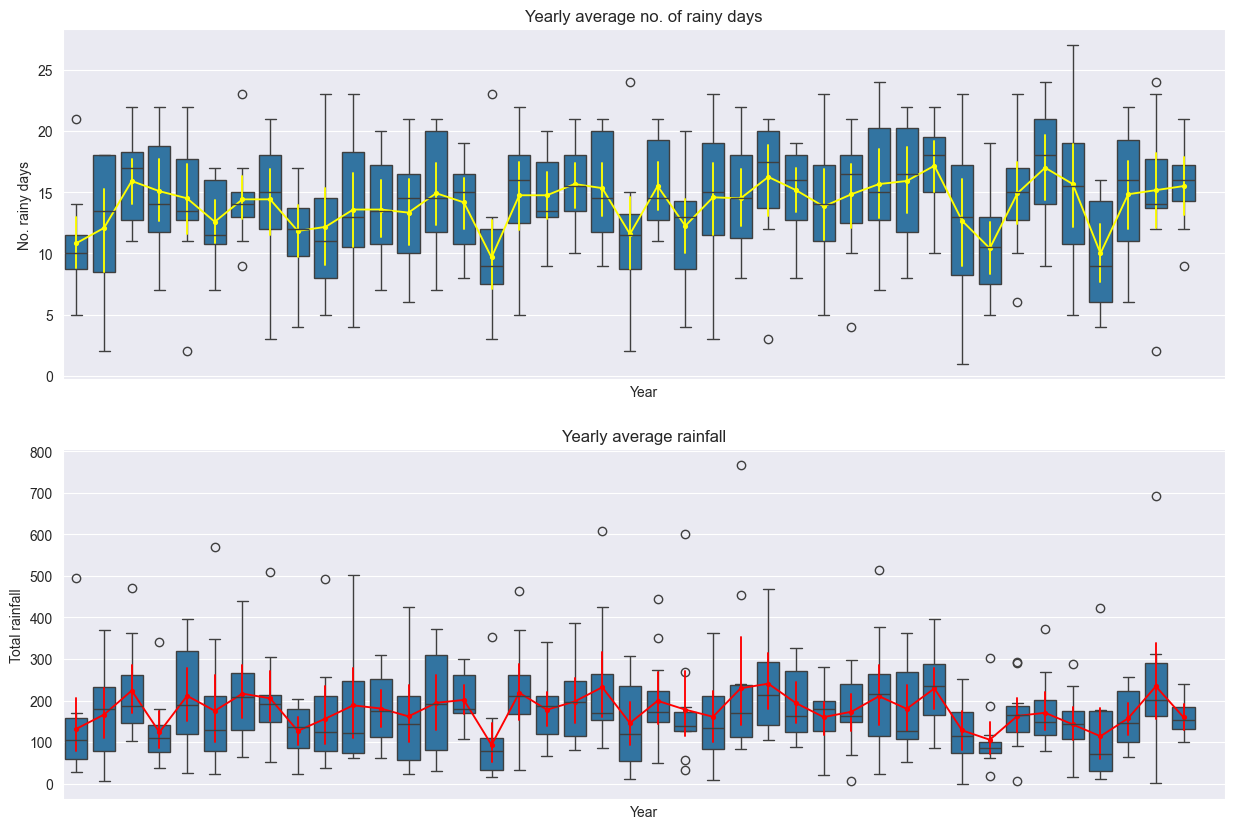

In [76]:
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
sns.boxplot(x = comb_month['month'].dt.year, y = comb_month['no_of_rainy_days']).set(xlabel='Year', ylabel='No. rainy days', title='Yearly average no. of rainy days', xticks=np.arange(1982, 2024, 1.0))

sns.pointplot(x = comb_month['month'].dt.year, y = comb_month['no_of_rainy_days'], color='yellow', scale=0.5);
plt.subplot(2,1,2)
sns.boxplot(x = comb_month['month'].dt.year, y = comb_month['total_rainfall']).set(xlabel='Year', ylabel='Total rainfall', title='Yearly average rainfall', xticks=np.arange(1982, 2024, 1.0))
sns.pointplot(x = comb_month['month'].dt.year, y = comb_month['total_rainfall'], color='red', scale=0.5);

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!